# EDA To Prediction (DieTanic)

時として人生は残酷なユーモアのセンスを見せつけてきます。欲しかったものを最悪のタイミングで与えてくるのです。
　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　– リサ・クレイパス

タイタニック号の沈没は、歴史上最も悪名高い海難事故のひとつです。1912年4月15日、処女航海中に氷山と衝突し沈没、乗客と乗員2224人のうち1502人が命を落としました。だからこそ、この名前は「DieTanic（死のタイタニック）」なのです。これは世界中の誰もが忘れられない非常に衝撃的な悲劇です。

タイタニック号の建造には約750万ドルがかかりましたが、衝突によって海の底に沈んでしまいました。タイタニック・データセットは、データサイエンスの学習を始めたい初心者にとって非常に良い教材であり、Kaggleのコンペティションに参加する際の第一歩としても適しています。

このノートブックの目的は、予測モデリング問題におけるワークフローの概要を示すことです。どのように特徴量を確認し、新たな特徴量を追加し、機械学習の概念を取り入れるのかといった流れを紹介しています。初心者にも理解しやすいように、できる限り基本的な内容にとどめるよう心がけました。

もしこのノートブックが役に立ったと感じたなら……ぜひ「いいね（Upvote）」してください。それが私のモチベーションになります。

## ノートブックの内容：



### 第1部：探索的データ解析（EDA）
1）特徴量の分析。
2）複数の特徴量を考慮したときの関係性や傾向の発見。

### 第2部：特徴量エンジニアリングとデータのクレンジング
1）いくつかの特徴量の追加。
2）冗長な特徴量の削除。
3）モデリングに適した形式への変換。

### 第3部：予測モデリング
1）基本的なアルゴリズムの実行。
2）交差検証（クロスバリデーション）。
3）アンサンブル（複数モデルの統合）。
4）重要な特徴量の抽出。

## Part1:Exploratory Data Analysis

### Check the Data

In [17]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data = pd.read_csv('./data/train.csv')

In [19]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
data.isnull().sum() #checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### How many Survived?

C:\Users\tatib\AppData\Local\Temp\ipykernel_5168\4223481782.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=data,ax=ax[1],palette='pastel')


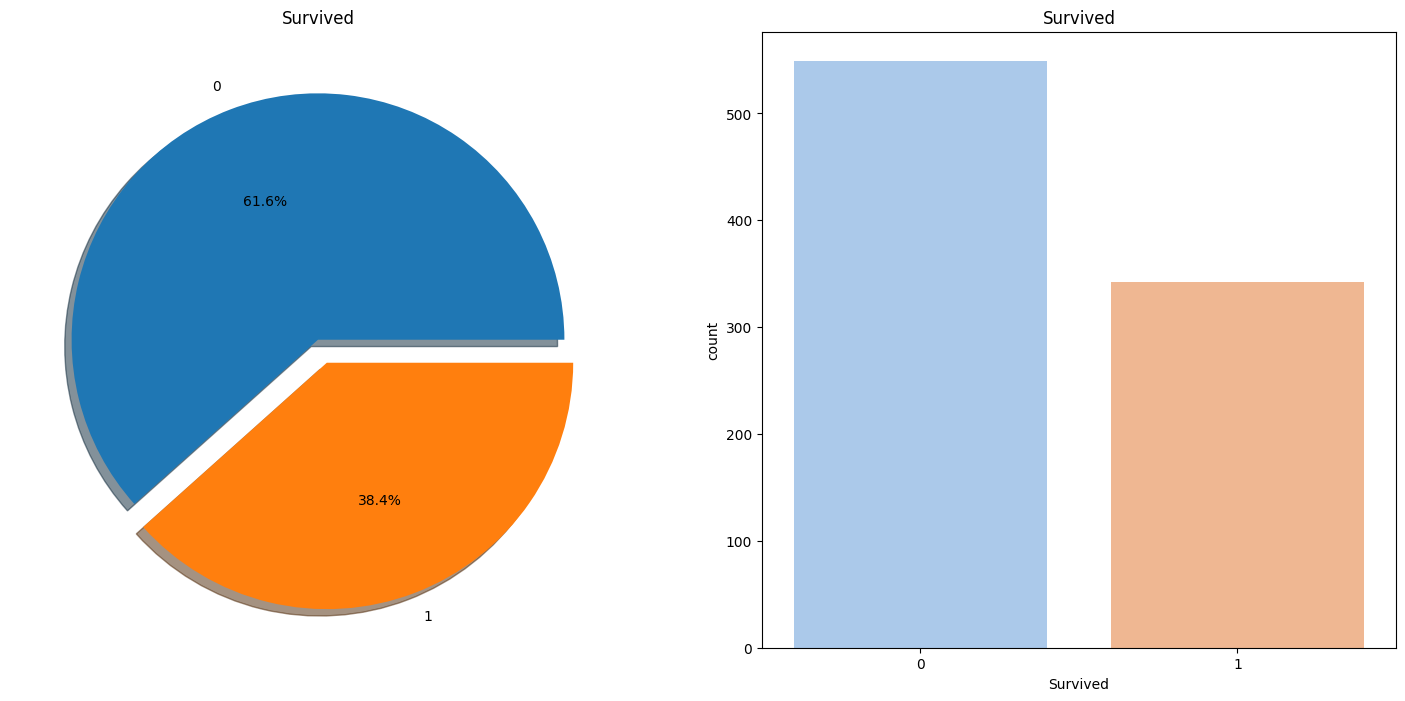

In [21]:
f,ax = plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived',data=data,ax=ax[1],palette='pastel')
ax[1].set_title('Survived')
plt.show()

- 2個のグラフを横並び（1行２列）で表示するために、subplotsを使う
- figsize=(18,8)1は全体のグラフのサイズを指定
- fはFigureオブジェクト、axは２つのAxes(サブプロット)を要素とするリスト
- data['Survived']：生存状況を示すカラム（0: 死亡、1: 生存）。
- value_counts()：0と1の出現回数をカウント。
- plot.pie(...)：その割合を円グラフ（pie chart）としてプロット。
- explode=[0, 0.1]：1つ目のピース（死亡）はそのまま、2つ目のピース（生存）は少し外にずらして目立たせます。
- autopct='%1.1f%%'：割合を小数点1桁まで表示（例: 61.6%）。
- ax=ax[0]：円グラフを左側のプロットに描画。
- shadow=True：影をつけて立体感を出す。



事故を生き延びた乗客はそれほど多くなかったことが明らかです。

訓練データセットに含まれる891人の乗客のうち、生存したのは約350人、つまり全体の**38.4%**しか生存できなかったということになります。
より深い洞察を得るためにデータをさらに掘り下げて、どのカテゴリの乗客が生存したのか、そして誰が生存できなかったのかを確認していく必要があります。

データセット内のさまざまな特徴量（特徴）を用いて、生存率を確認していきましょう。
調べる特徴量の一部としては、性別、乗船した港、年齢などが含まれます。

まずは、さまざまな種類の特徴量について理解していきましょう。

### Types Of Features

#### カテゴリカル特徴量（Categorical Features）
カテゴリカル変数とは、2つ以上のカテゴリ（分類）を持ち、その特徴量の各値がそれらのカテゴリによって分類される変数のことです。
たとえば「性別」はカテゴリカル変数で、「男性」と「女性」という2つのカテゴリがあります。
このような変数には順序性や大小の比較が存在せず、ソート（並び替え）することができません。
こうした変数は 名義変数（Nominal Variables） とも呼ばれます。

このデータセットにおけるカテゴリカル特徴量：Sex（性別）, Embarked（乗船港）

#### 順序特徴量（Ordinal Features）
順序変数は、カテゴリカル変数に似ていますが、値の間に相対的な順序（大小関係）を持つという点で異なります。
例えば、Height（身長） という特徴量が Tall（高い）, Medium（中間）, Short（低い） という値を持っている場合、この「Height」は順序変数となります。
このように、値の間でソートや比較が可能です。

このデータセットにおける順序特徴量：PClass（客室等級）

#### 連続特徴量（Continuous Feature）
連続変数とは、任意の2点の間に無数の値を取りうる変数のことです。
つまり、最小値と最大値の間であればどんな数値も取り得るという特徴があります。

このデータセットにおける連続特徴量：Age（年齢）

#### How to Anlyze violin plot

![](./img/image1.png)

- Outside Points ： 分布の外部
- Upper Adjacent Value : 分布の最上位(外れ値は除く)
- Third Quartile : 第3四分位数
- Median : 中央値
- First Quartile : 第1四分位数
- Lower Adjacent Value : 分布の最下位(外れ値は除く)

### Analysing The Features

#### Sex-->Categorical Feature

In [22]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

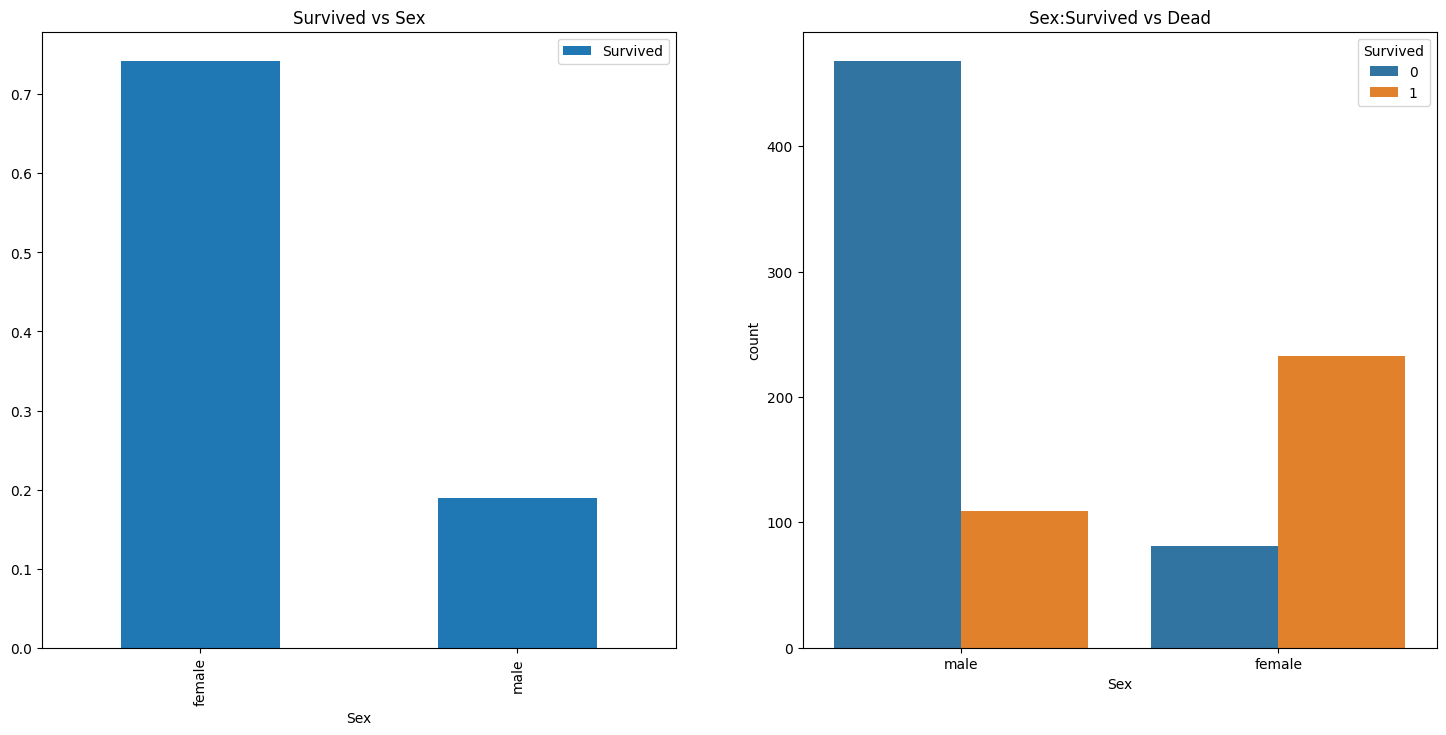

In [23]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

これは興味深いですね。船に乗っていた男性の数は女性の数よりもずっと多いです。それでも、救助された女性の数は、救助された男性のほぼ2倍にのぼります。生存率は 女性が約75% に対し、男性は約18〜19% です。

これはモデリングにおいて非常に重要な特徴量のように見えます。しかし、これが本当に最も重要なのでしょうか？ 他の特徴量も確認してみましょう。

#### Pclass-->Ordinal Feature

In [24]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


- data.Pclass：乗客の等級（1等、2等、3等）

- data.Survived：生存したかどうか（0=死亡、1=生存）

- pd.crosstab(...)：この2つの変数の クロス集計表 を作成します。

- 各等級ごとに生存・死亡人数が集計される

- margins=True：行・列の**合計（All）**を表示する

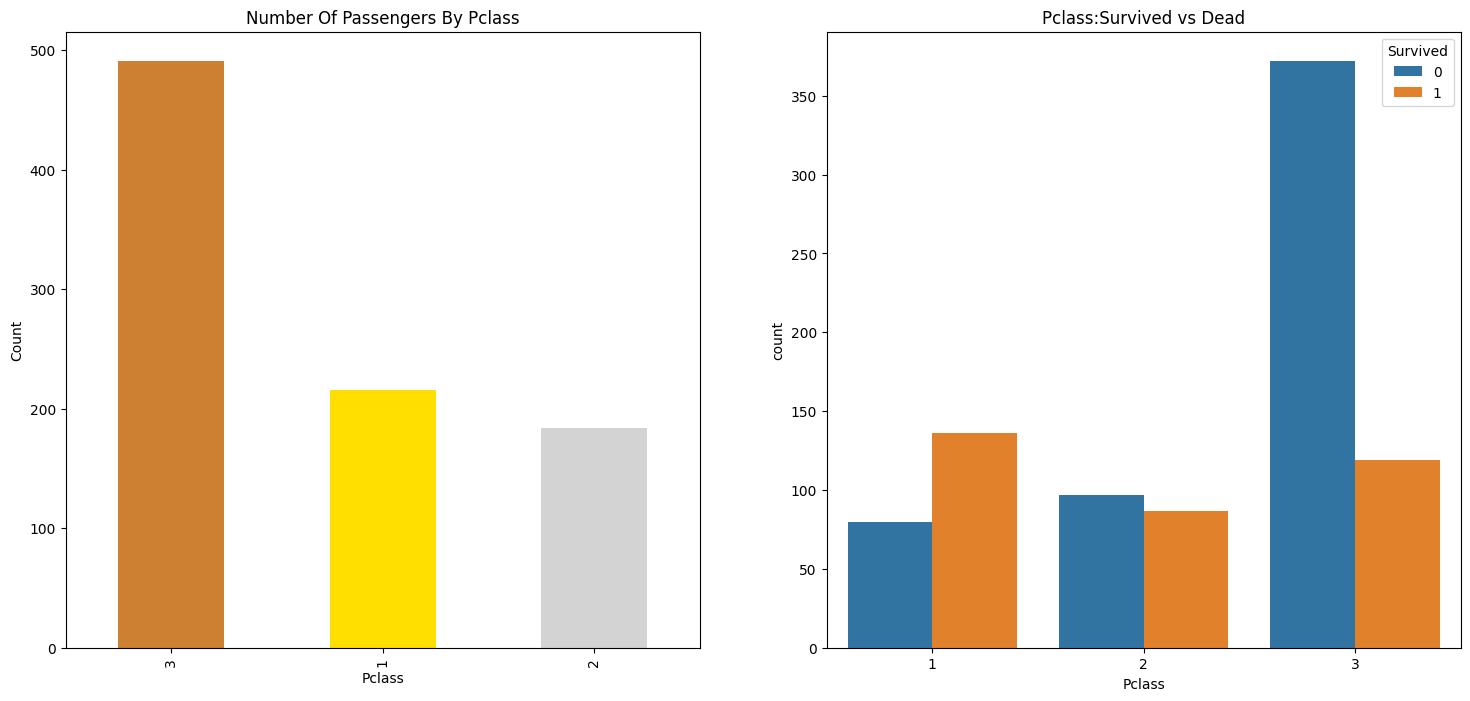

In [25]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

人々は「お金ですべては買えない」と言います。しかし、明らかにPclass 1（1等客室）の乗客は救助の際に非常に優先されていたことがわかります。Pclass 3（3等客室）の乗客数ははるかに多かったにもかかわらず、彼らの生存率は非常に低く、およそ**25%**程度しかありません。

Pclass 1の生存率は約63%、Pclass 2では約**48%**です。つまり、お金と地位は影響しているのです。なんと物質主義的な世界でしょう。

もう少し深掘りして、他の興味深い観察結果を確認してみましょう。次は 性別（Sex）と客室クラス（Pclass） を組み合わせて、生存率を見てみましょう。

In [26]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

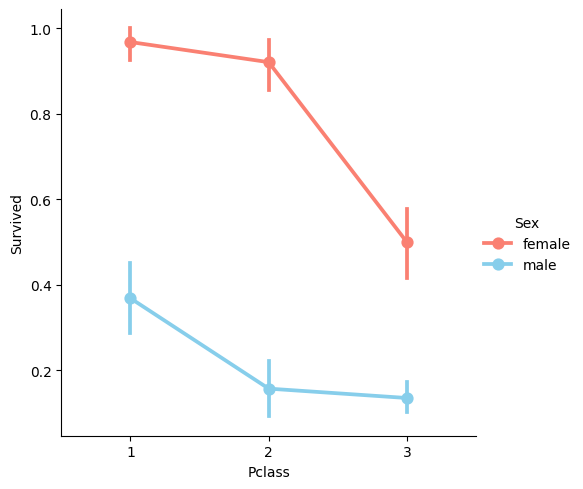

In [41]:
sns.catplot(x='Pclass',
            y='Survived',
            kind='point',
            hue='Sex',
            data=data,
            palette={"male": "skyblue", "female": "salmon"}
            )
plt.show()

このケースでは catplot を使用しています。これはカテゴリ値の分離を簡単にしてくれるからです。

CrossTab と catplot を見ると、Pclass1（1等客室）の女性の生存率は 約95〜96% であると簡単に推測できます。というのも、Pclass1の女性94人中、死亡したのはたったの3人だったからです。

等級に関係なく、救助の際には女性が最優先されたことが明らかです。Pclass1の男性でさえ、生存率は非常に低いのです。

Pclass（客室クラス）も重要な特徴量のようです。他の特徴量についても分析してみましょう。

#### Age--> Continous Feature

In [28]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


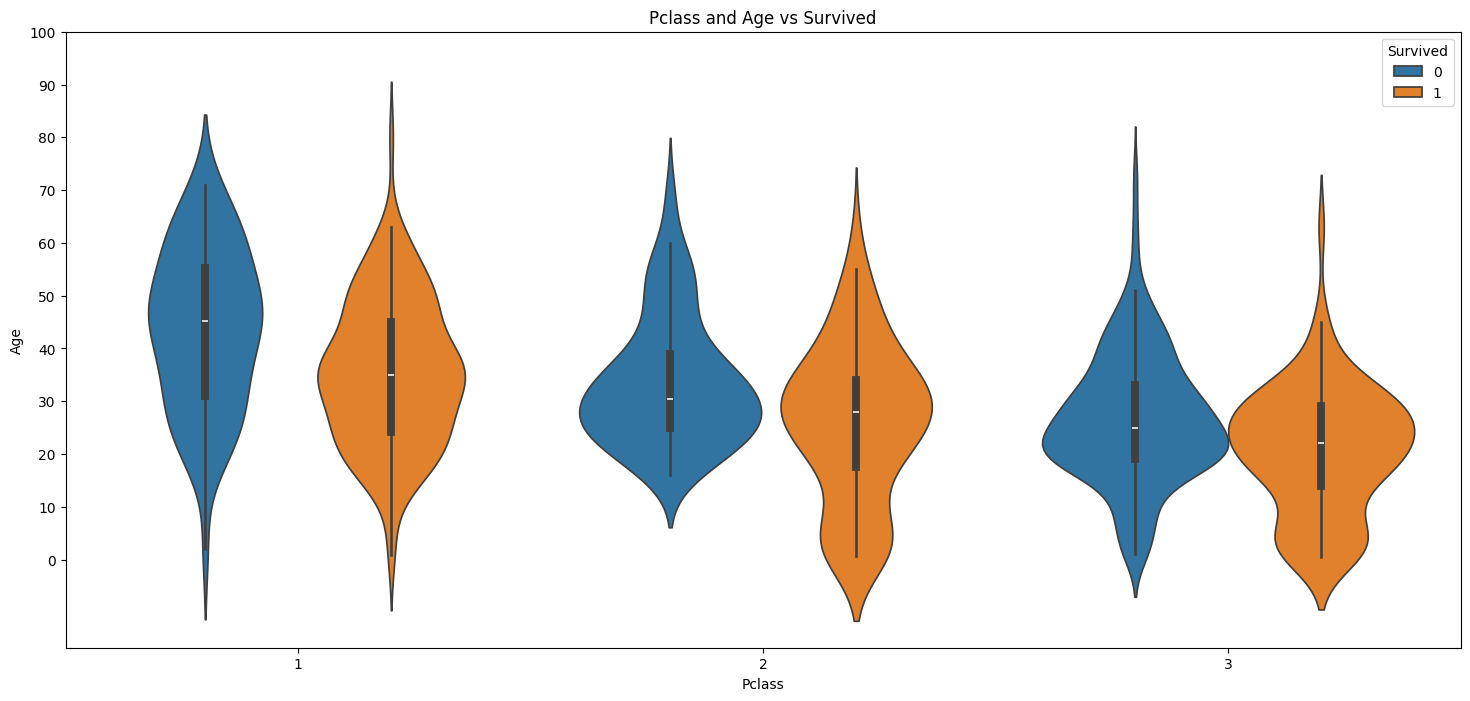

In [29]:
f,ax=plt.subplots(1,figsize=(18,8))
sns.violinplot(x = "Pclass", y = "Age", hue="Survived", data=data,ax=ax,inner="box")
ax.set_title('Pclass and Age vs Survived')
ax.set_yticks(range(0,110,10))

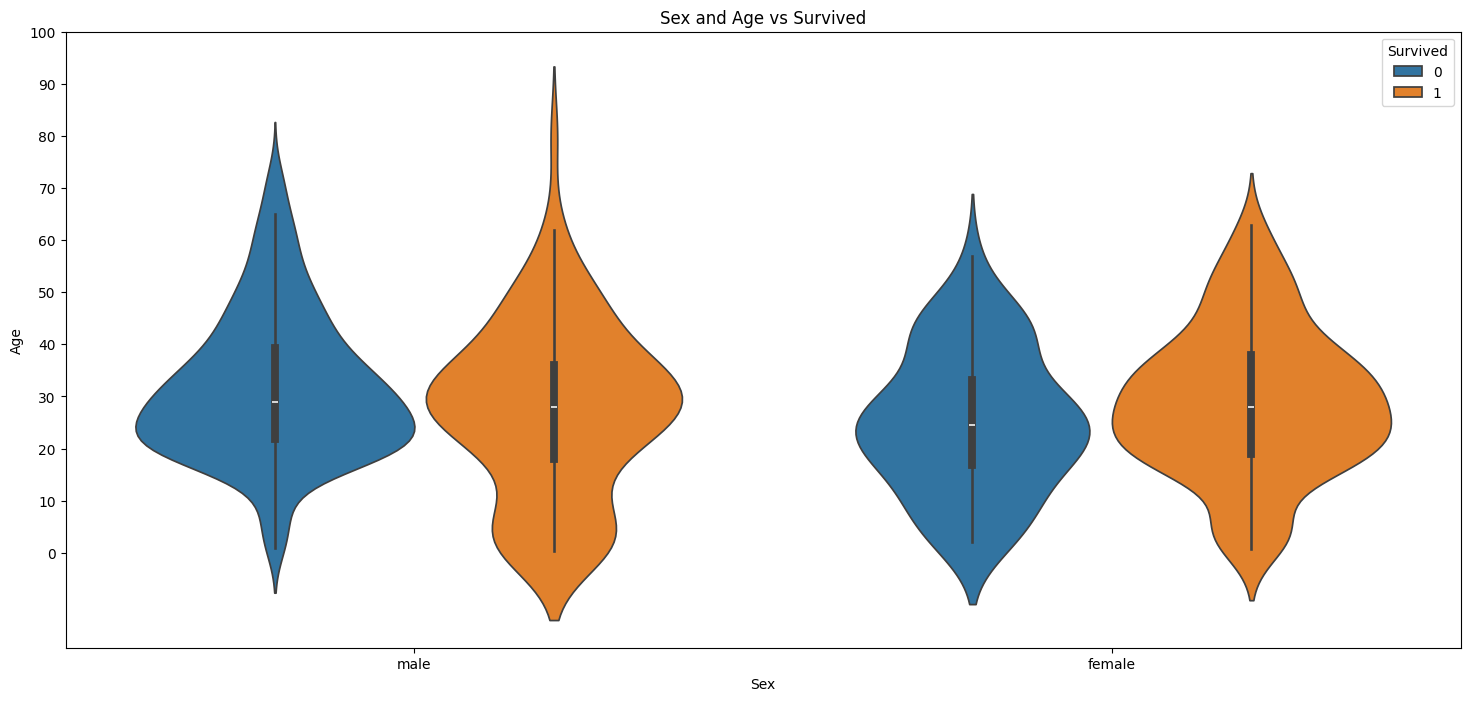

In [30]:
f,ax=plt.subplots(1,figsize=(18,8))
sns.violinplot(x="Sex",y="Age", hue="Survived", data=data,ax=ax,inner="box")
ax.set_title('Sex and Age vs Survived')
ax.set_yticks(range(0,110,10))
plt.show()

#### Observations:

1）子供の人数は等級（Pclass）が下がるにつれて増加しており、年齢10歳未満（子供）の乗客の生存率は、Pclassに関係なく高いように見えます。

2）Pclass1（1等）の乗客のうち、20〜50歳の乗客の生存率は高く、特に女性に関してはさらに良好です。

3）男性の場合、年齢が上がるにつれて生存率が低下する傾向があります。

以前にも見たように、Age（年齢） の特徴量には 177個の欠損値（NaN） が存在します。
このNaNを埋める方法としては、データセット全体の平均年齢を割り当てるという手段があります。

しかし問題があります。それは、乗客の年齢には大きな幅があるということです。
例えば、4歳の子供に29歳という平均年齢を割り当てるのは適切ではありませんよね。
では、乗客がどの年齢層に属するのかを判断する方法はないのでしょうか？



ビンゴ！！
ここで注目すべきは Name（名前） の特徴量です。
この列をよく見ると、Mr や Mrs といった敬称（salutation）が含まれていることがわかります。
つまり、「Mr」や「Mrs」などの敬称ごとに平均年齢を計算し、それぞれのグループに割り当てるという方法が使えそうです。



「名前に何があるのか？」（"What's In A Name??"） → 実はそれは立派な 特徴量（Feature） だったのです 😄

In [31]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
C:\Users\tatib\AppData\Local\Temp\ipykernel_5168\2487429940.py:3: SyntaxWarning: invalid escape sequence '\.'
  data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations


さて、ここでは正規表現（Regex）[A-Za-z]+ を使っています。
これが何をするかというと、A〜Z または a〜z の文字列を探し、それに続いて .（ドット） があるものを対象とします。
このようにして、名前からイニシャルを抽出することに成功しています。

In [32]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


「Mlle」や「Mme」のように、スペルミスされたイニシャルがいくつかありますが、これらは「Miss」を意味しています。私はそれらを「Miss」に置き換えます。他の値についても同様に処理します。

In [33]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

C:\Users\tatib\AppData\Local\Temp\ipykernel_5168\417967907.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)


In [34]:
data.groupby('Initial')['Age'].mean() #lets check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [35]:
## Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [36]:
data.Age.isnull().any() #So no null values left finally 

np.False_

C:\Users\tatib\AppData\Local\Temp\ipykernel_5168\777669932.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Survived'] == 0]['Age'].dropna(),
C:\Users\tatib\AppData\Local\Temp\ipykernel_5168\777669932.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Survived'] == 1][

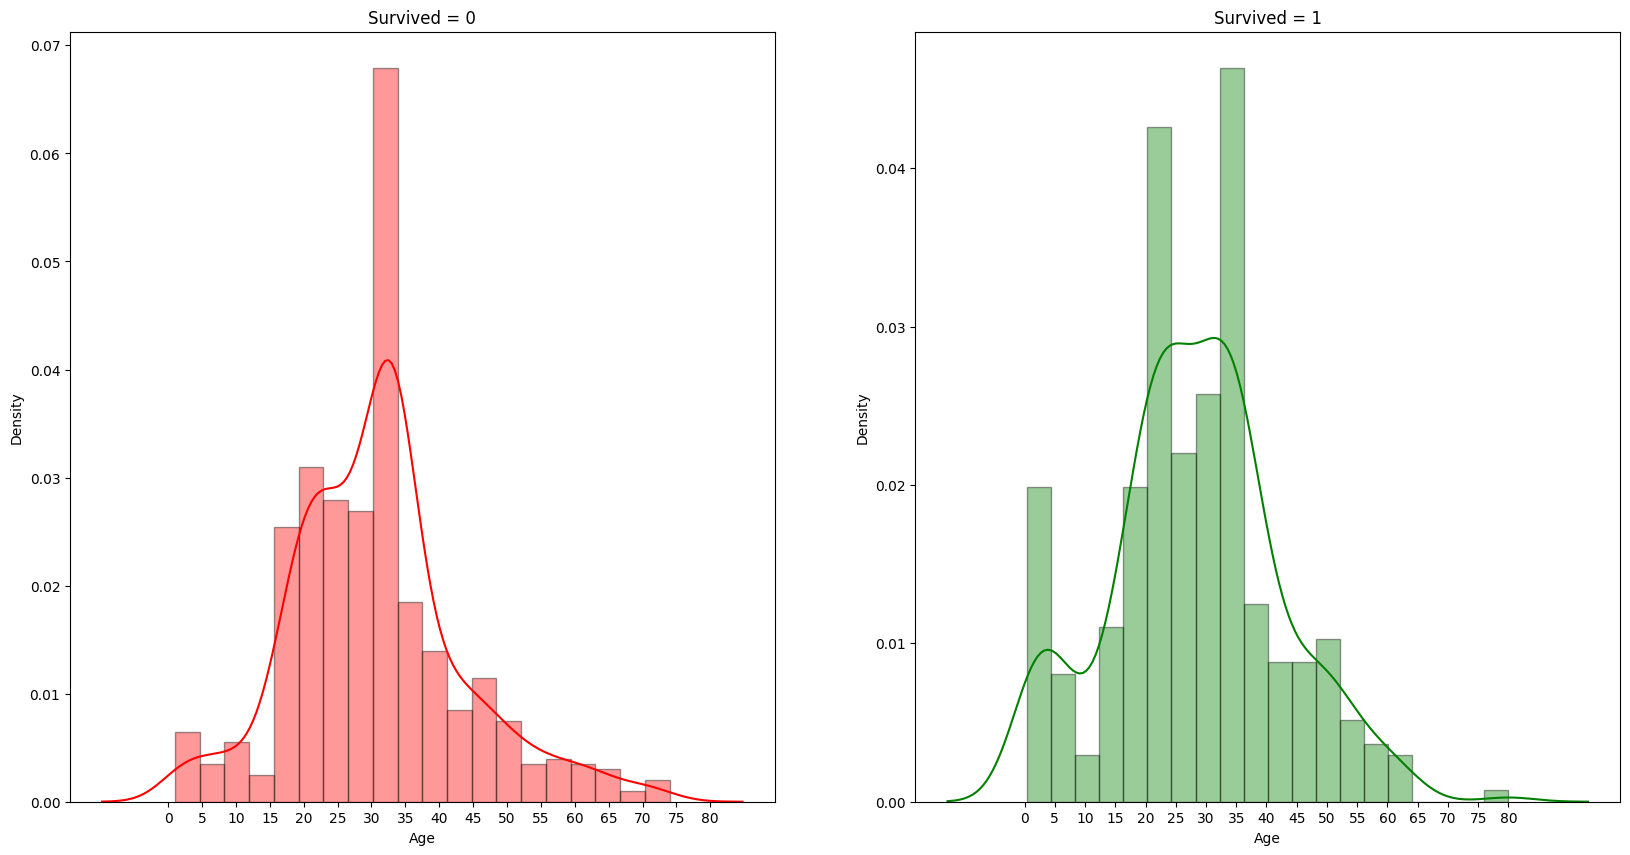

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(1, 2, figsize=(20, 10))

# 非生存者の年齢分布
sns.distplot(data[data['Survived'] == 0]['Age'].dropna(), 
             bins=20, ax=ax[0], color='red', hist=True, kde=True, 
             hist_kws={'edgecolor': 'black'})
ax[0].set_title('Survived = 0')
ax[0].set_xticks(list(range(0, 85, 5)))

# 生存者の年齢分布
sns.distplot(data[data['Survived'] == 1]['Age'].dropna(), 
             bins=20, ax=ax[1], color='green', hist=True, kde=True, 
             hist_kws={'edgecolor': 'black'})
ax[1].set_title('Survived = 1')
ax[1].set_xticks(list(range(0, 85, 5)))

plt.show()


### Observation

- 幼児（5歳未満） は多数救助された（女性・子ども優先の原則による）。

- 最高齢の乗客（80歳） は救助された

- 最も多くの死者が出たのは30〜40歳の年齢層であった。


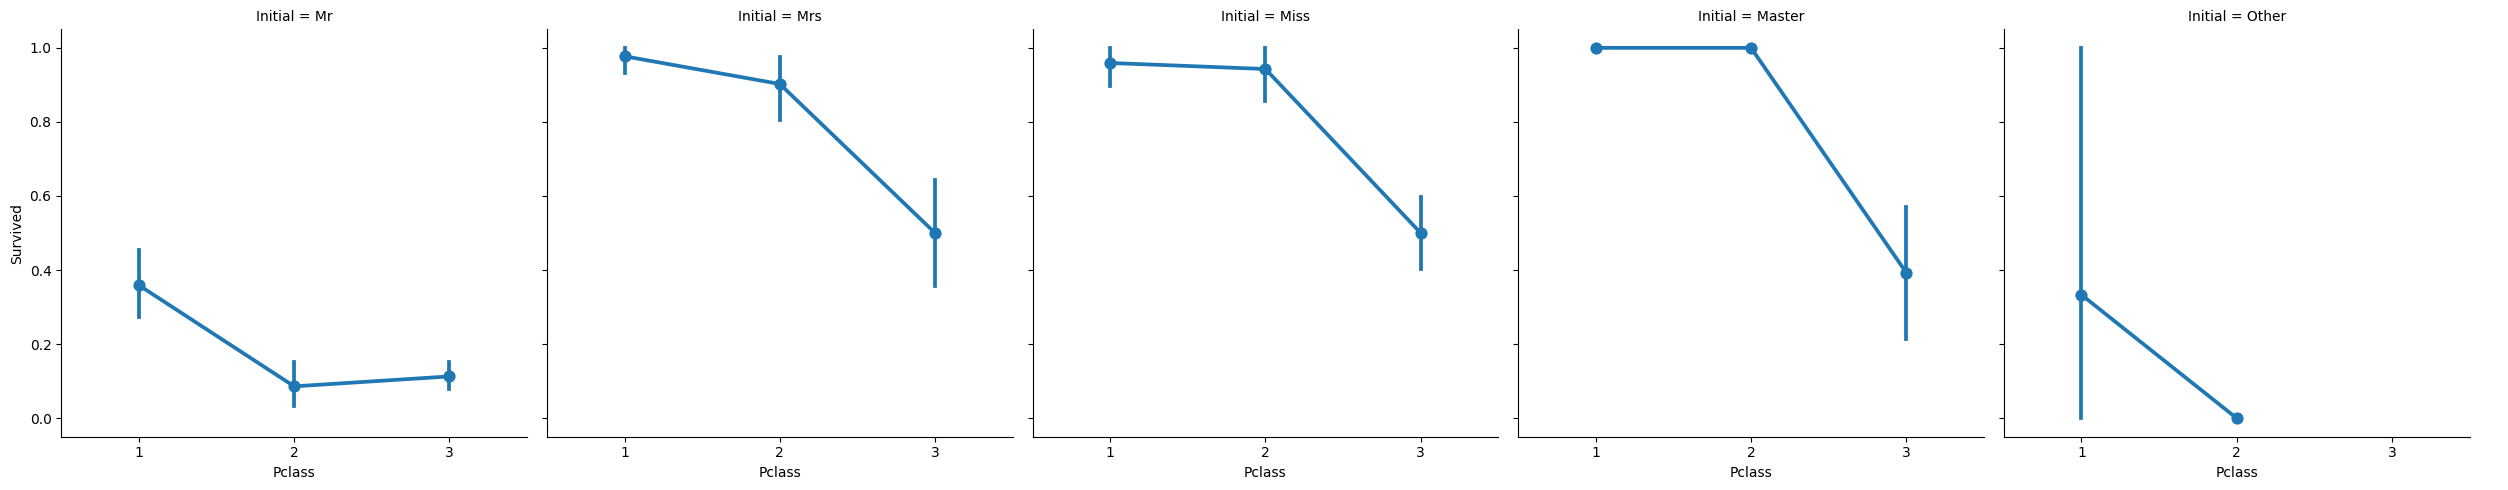

In [42]:
sns.catplot(x='Pclass', y='Survived', col='Initial', kind='point', data=data)
plt.show()


「女性と子ども優先の原則」は、客室クラスに関係なく当てはまることがわかった。

### Embarked--> Categorical Value

In [43]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

### 乗船港ごとの生存率

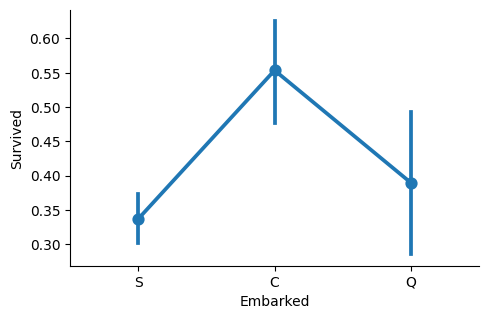

In [45]:
sns.catplot(x='Embarked',y='Survived',data=data,kind='point',)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

C港（Cherbourg）から乗船した乗客の生存率が最も高く、およそ0.55（55%）である一方で、S港（Southampton）から乗った乗客の生存率が最も低い。

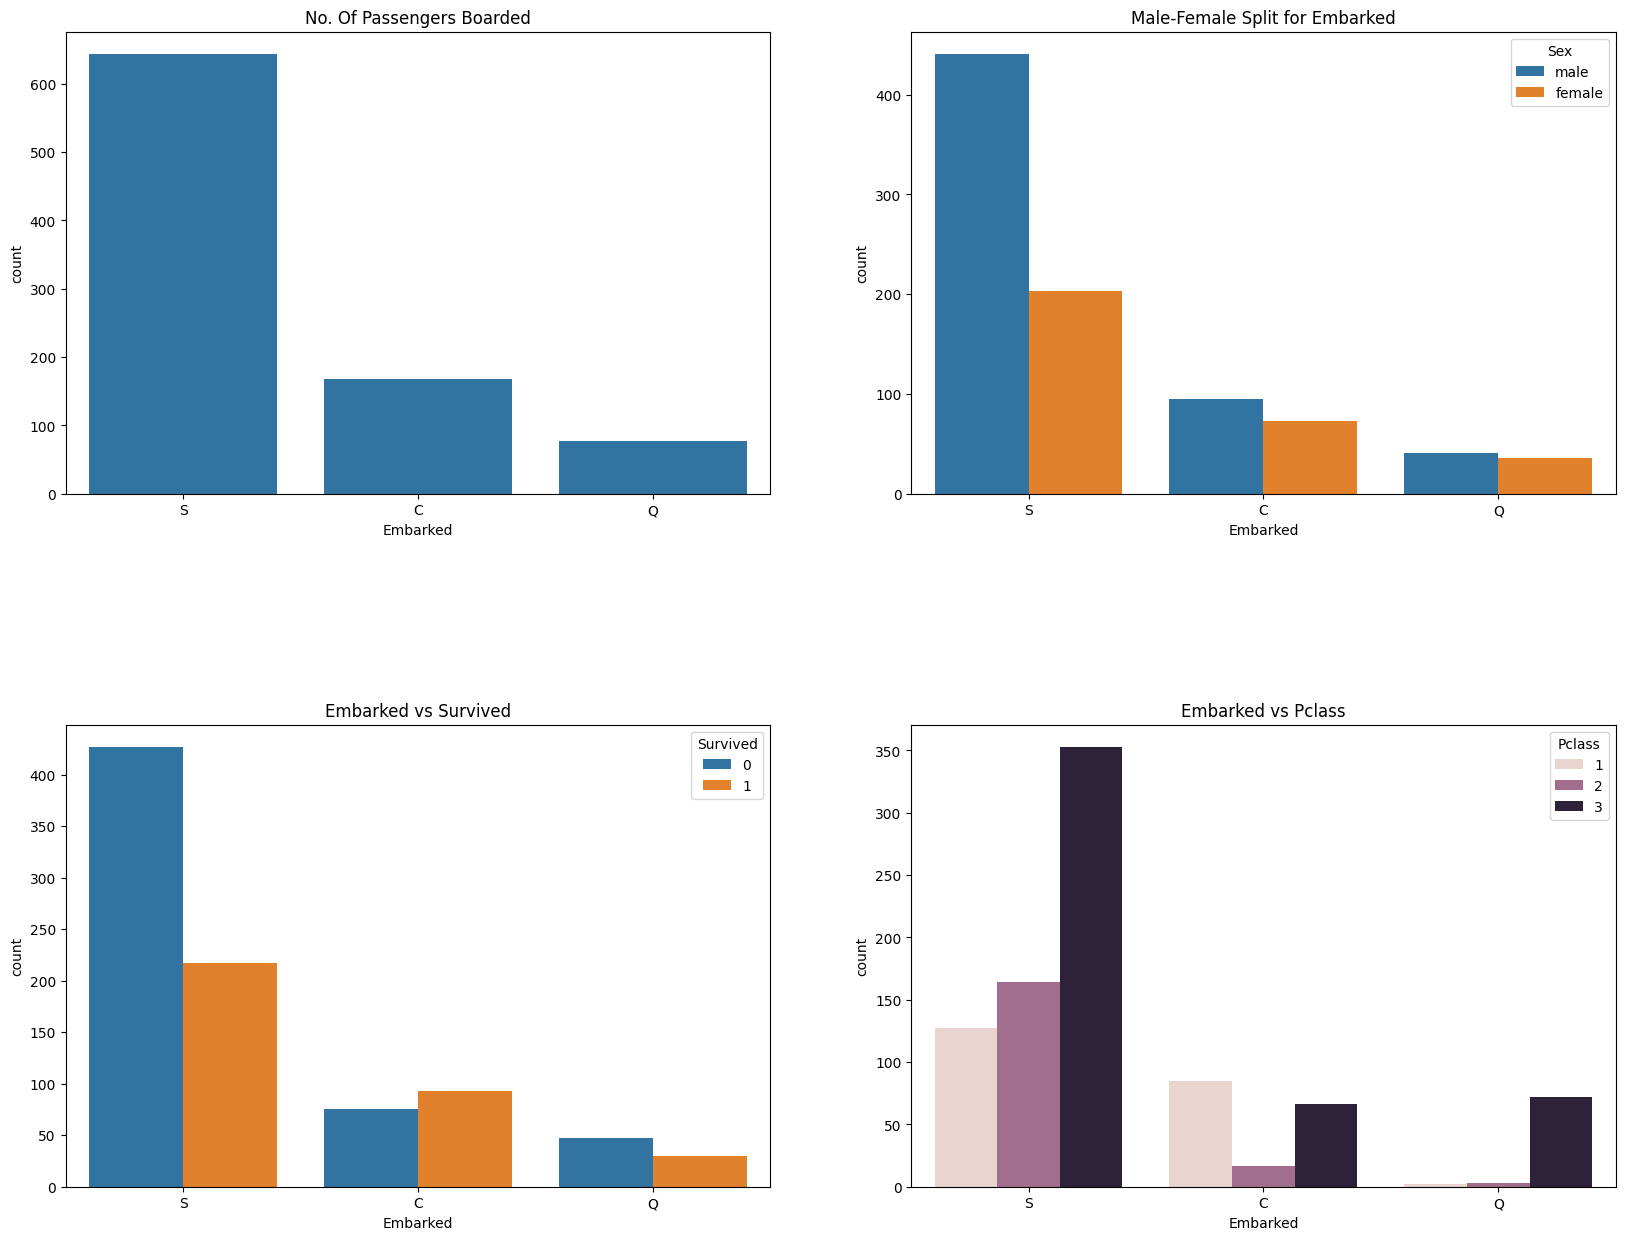

In [47]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot(x='Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot(x='Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot(x='Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot(x='Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

### Observations:

- 最も多くの乗客がS港から乗船しており、その大多数は**3等客室（Pclass3）**の乗客でした。

- C港からの乗客は幸運だったように見える。というのも、多くの乗客が生存していたためです。その理由は、おそらく 1等・2等客室の乗客が多く救助されたためでしょう。

- S港は裕福な人々が多く乗船した港のようですが、生存率は低いです。これは、3等客室の乗客のうち約81%が生存できなかったことが原因です。

- Q港では、乗客のおよそ95%が3等客室の乗客でした。

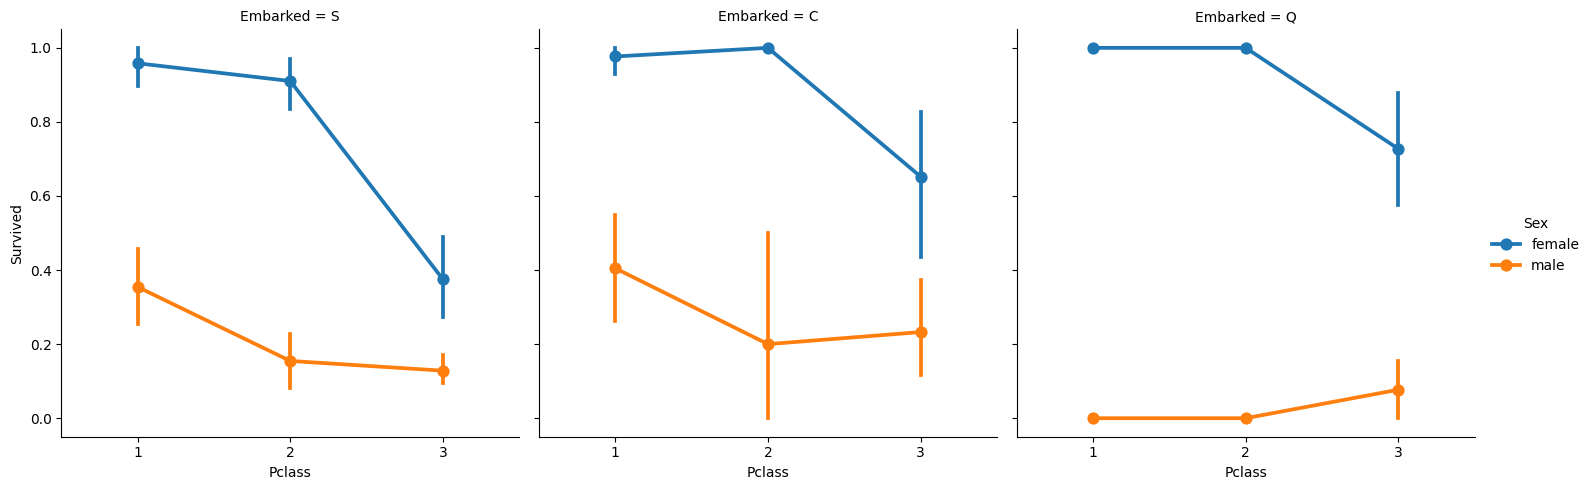

In [49]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',col='Embarked',data=data,kind='point')
plt.show()

- Pclass1 および Pclass2 の女性の生存率はほぼ 1 に近く、クラスに関係なく非常に高い。

- S 港は Pclass3 の乗客にとって非常に不運だったように見える。男性・女性ともに生存率が非常に低かった。（お金の力は大きい）

- Q 港は男性にとって最も不運だったようだ。というのも、ほとんどが Pclass3 の乗客だったためである。









### Embarked（乗船港）の NaN 値の補完


最も多くの乗客が S 港（Southampton）から乗船していたことがわかっているため、NaN を S で埋めます。

### SibSip-->Discrete Feature

この特徴量は、その人物が一人でいるか、家族と一緒にいるかを示します。

Sibling（兄弟姉妹） ＝ 兄、姉、弟、妹、義兄弟、義姉妹

Spouse（配偶者） ＝ 夫、妻

In [53]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


c:\Users\tatib\EDA\.venv\Lib\site-packages\seaborn\categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try pointplot
  warnings.warn(msg, UserWarning)


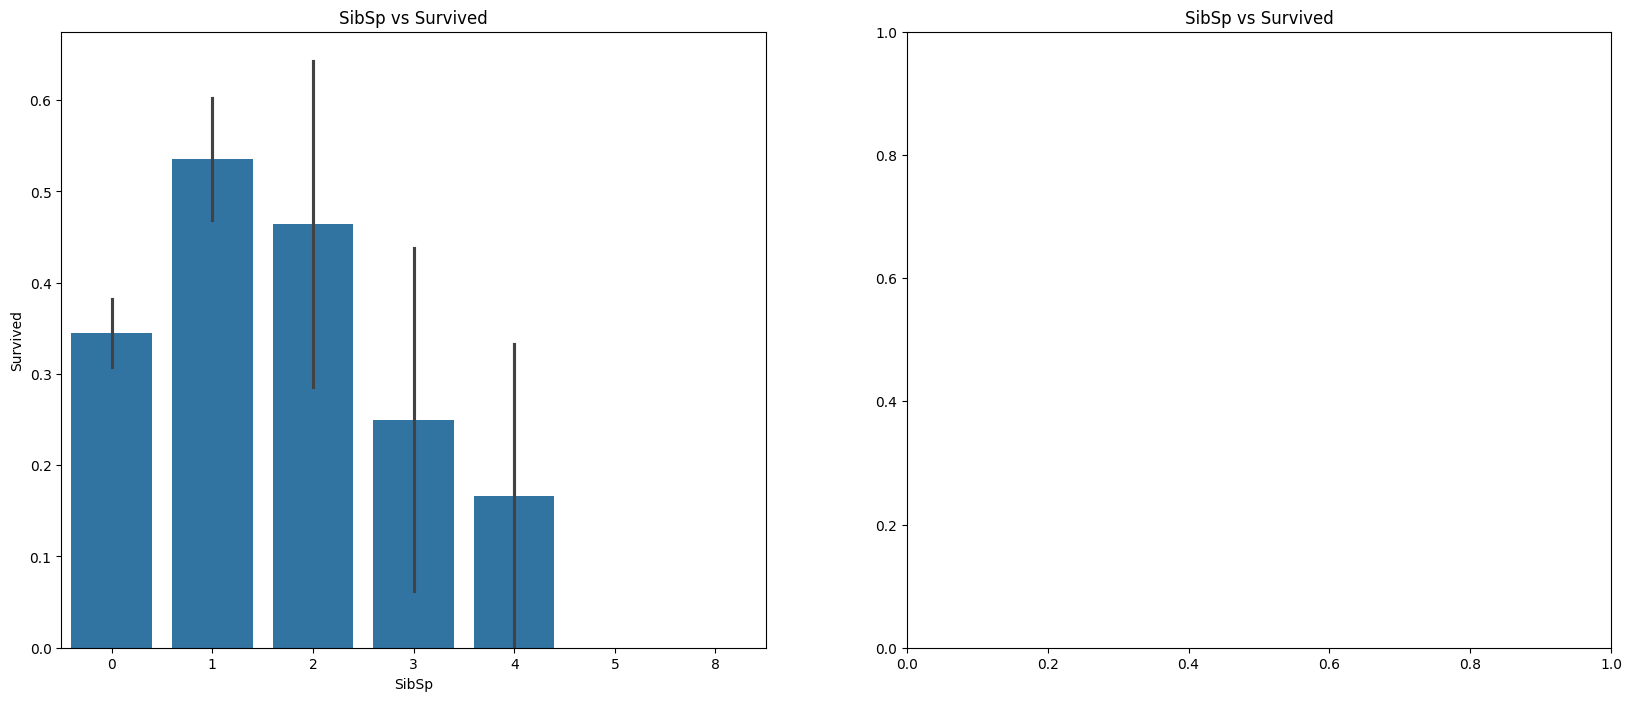

In [56]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(x='SibSp',y='Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.catplot(x='SibSp',y='Survived',data=data,ax=ax[1],kind='point')
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

### Fare--> Continous Feature

In [50]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


C:\Users\tatib\AppData\Local\Temp\ipykernel_5168\2377214865.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
C:\Users\tatib\AppData\Local\Temp\ipykernel_5168\2377214865.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Pclass']==2].Fare,ax=a

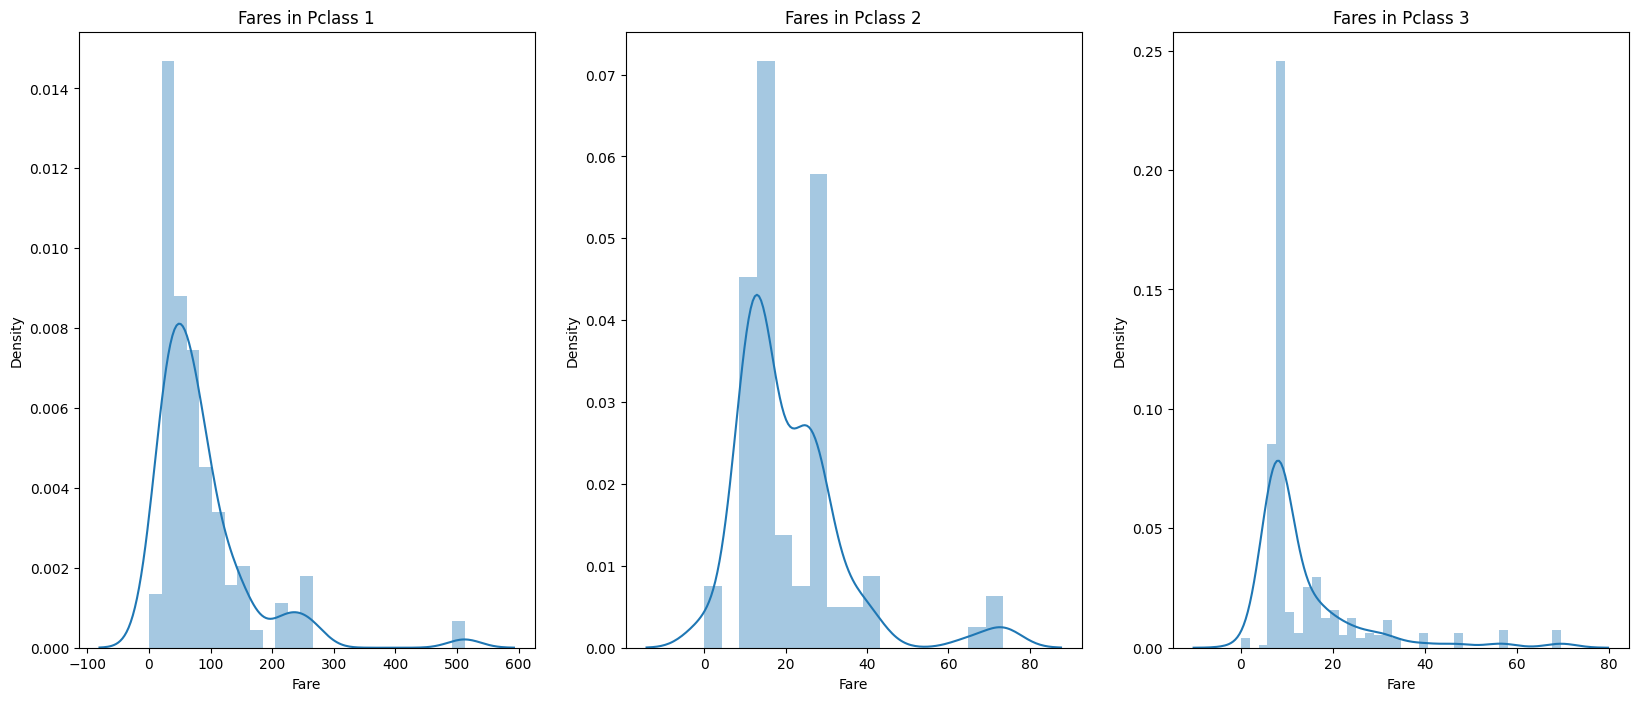

In [51]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

最低運賃は 0.0。なんと！無料の豪華な旅だったんですね。

### 特徴量ごとの要約的な観察結果：

Sex（性別）：
女性の生存率は、男性と比べて高い。

Pclass（客室等級）：
1等客室であることは、明らかに生存率の向上と関係している。
Pclass3（3等）の生存率は非常に低い。
女性に限っては、Pclass1 の生存率はほぼ1に近く、Pclass2 でも高い。
お金の力が勝つ！

Age（年齢）：
5～10歳未満の子どもは、生存率が高い。
一方で、15歳〜35歳の乗客は多くが亡くなっている。

Embarked（乗船港）：
これは非常に興味深い特徴である。
C 港の生存率は高いように見える。
たとえ Pclass1 の乗客の多くが S 港から乗っていたとしても、C 港の方が生存率が高い。
Q 港の乗客はすべて Pclass3 である。

Parch + SibSp（家族構成）：
兄弟姉妹が1〜2人、配偶者、または親が1〜3人いる場合は、生存率が高い傾向がある。
一人でいる場合や、非常に大人数の家族と一緒にいる場合に比べて、生存の可能性は高い。

### Correlation Between The Features

In [52]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()


ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

### ヒートマップの解釈

まず最初に注意すべき点は、比較されているのは数値型の特徴量だけであるということです。文字列やアルファベット同士は相関関係を持たないためです。プロットを理解する前に、「相関」とは何かを確認しましょう。

### 正の相関（POSITIVE CORRELATION）：
もし特徴量 A の増加が特徴量 B の増加につながる場合、これらは正の相関があると言えます。
値が 1 のとき、それは完全な正の相関を意味します。

### 負の相関（NEGATIVE CORRELATION）：

もし特徴量 A の増加が特徴量 B の減少につながる場合、それらは負の相関があります。
値が -1 のとき、それは完全な負の相関を意味します。


では、2つの特徴量が非常に高い、もしくは完全に相関していると仮定しましょう。このとき、一方が増加するともう一方も増加します。
これは両方の特徴量が非常に類似した情報を持っていて、情報のばらつき（分散）がほとんどないことを意味します。
このような状況は 多重共線性（MultiColinearity） と呼ばれます。両者がほぼ同じ情報を持っているためです。

では、その両方の特徴量を使うべきでしょうか？
答えは「いいえ」、そのうち一方は冗長である と考えます。モデルを学習する際には、冗長な特徴量を排除することが望ましく、そうすることで学習時間を短縮し、多くの利点が得られます。

上のヒートマップから、特徴量間にはそれほど高い相関はないことがわかります。
最も高い相関は SibSp（兄弟・配偶者数） と Parch（親・子供数） の間であり、その値は 0.41 です。
したがって、全ての特徴量をそのまま使用して問題ないと判断できます。


## Part2: Feature Engineering and Data Cleaning


このケースでは FactorPlot を使用しています。これは、カテゴリ変数の分離を簡単にしてくれるからです。

CrossTab と FactorPlot を見ることで、1等客室の女性（Women from Pclass1） の生存率が およそ95〜96% であることが簡単にわかります。なぜなら、1等客室の女性94人中3人しか死亡していないからです。

客室の等級に関係なく、女性は救助の際に最優先されたことは明らかです。一方で、1等客室の男性でさえ、生存率は非常に低かったのです。

どうやら、Pclass（客室の等級）も重要な特徴量のようです。他の特徴量も分析していきましょう。



### Dropping UnNeeded Features

- Name → 名前はカテゴリ変数に変換できないため、必要ありません。

- Age → Age_band 特徴量があるので、Age は不要です。

- Ticket → ランダムな文字列で、カテゴリ化できないため不要です。

- Fare → Fare_cat 特徴量があるので、Fare は不要です。

- Cabin → 欠損値が非常に多く、多くの乗客が複数のキャビンを持っているため、無意味な特徴量です。

- Fare_Range → fare_cat があるので不要です。

- PassengerId → カテゴリ化できないため不要です。



In [ ]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'], axis=1, inplace=True)

- drop()：指定した列を削除。

- axis=1：列方向の操作（0 なら行方向）。

- inplace=True：data に対して直接変更を加える（コピーを返さない）。

- 削除対象は、カテゴリ化できない or すでに変換済みの冗長な特徴量。

In [ ]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})

- data.corr()：数値特徴量間のピアソン相関係数の行列を計算。

- sns.heatmap()：ヒートマップで可視化。

- annot=True：各セルに相関係数を表示。

- cmap='RdYlGn'：赤（負の相関）〜緑（正の相関）のカラーマップ。

- linewidths=0.2：セルの間の罫線幅。

- annot_kws={'size':20}：相関係数の文字サイズを20ptに指定。



In [ ]:
fig = plt.gcf()
fig.set_size_inches(18, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


- plt.gcf()：現在の図 (figure) を取得。

- fig.set_size_inches(18,15)：図のサイズを指定（横18インチ × 縦15インチ）。

- xticks / yticks：軸ラベルのフォントサイズを14ptに設定。

In [ ]:
plt.show()

上の相関プロットから、いくつかの正の相関を持つ特徴量が確認できます。
その一部は、SibSp と Family_Size, Parch と Family_Size などです。
また、Alone と Family_Size のように負の相関を持つ特徴量もあります。

## Part3.Predictive Modeling

パート3：予測モデリング
EDA（探索的データ分析）からいくつかの洞察を得ることができました。しかし、それだけでは、乗客が生存するか死亡するかを正確に予測することはできません。
そこで、乗客が生存するか否かを、優れた分類アルゴリズムを使って予測していきます。以下はモデル構築に使用するアルゴリズムです：

- ロジスティック回帰

- サポートベクターマシン（線形・ラジアル）

- ランダムフォレスト

- K近傍法

- ナイーブベイズ

- 決定木

- ロジスティック回帰（※重複記載）

